    classify the Size_Categorie using SVM

    month	month of the year: 'jan' to 'dec'
    day	day of the week: 'mon' to 'sun'
    FFMC	FFMC index from the FWI system: 18.7 to 96.20
    DMC	DMC index from the FWI system: 1.1 to 291.3
    DC	DC index from the FWI system: 7.9 to 860.6
    ISI	ISI index from the FWI system: 0.0 to 56.10
    temp	temperature in Celsius degrees: 2.2 to 33.30
    RH	relative humidity in %: 15.0 to 100
    wind	wind speed in km/h: 0.40 to 9.40
    rain	outside rain in mm/m2 : 0.0 to 6.4
    
    
    Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.shape

(517, 31)

In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
# dropping the month column
df.drop(['month','day'],axis=1,inplace=True)

In [7]:
## checking output column
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [8]:
# Label encoding size category column

from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
df['size_category']=encoder.fit_transform(df['size_category'])



In [9]:
df.shape

(517, 29)

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
print('Shape of dataframe after dropping duplicates',df.shape)

Shape of dataframe after dropping duplicates (509, 29)


In [12]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
## Splitting into X and Y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

t=[('num',StandardScaler(),['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])]
transformer=ColumnTransformer(transformers=t,remainder='passthrough')

# fit training data
X=transformer.fit_transform(X)


In [15]:
X

array([[-0.79603981, -1.31838569, -1.82893094, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00325666, -1.1740525 ,  0.48925693, ...,  0.        ,
         1.        ,  0.        ],
       [-0.00325666, -1.04383887,  0.56104493, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.62485856, -0.8398898 ,  0.47514131, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68141971,  0.56108339,  0.26985988, ...,  0.        ,
         0.        ,  0.        ],
       [-2.00323234, -1.68235633, -1.77892132, ...,  1.        ,
         0.        ,  0.        ]])

In [16]:
# Splitting into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


### Standardizing continuous column type using ColumnTransformer

In [17]:
X_train

array([[ 0.66340191, -0.39433954,  0.58282331, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.51925952, -0.39120186, -0.61619766, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0302712 , -1.29799078, -0.78356856, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.79603981, -1.31838569, -1.82893094, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8255621 ,  1.68594092,  0.57354733, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44718832,  0.73836219,  0.47957764, ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (407, 28)
Shape of testing data (102, 28)


### Building SVM model

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [20]:
# Defining base model
model1 = SVC()

model1.fit(X_train , y_train)

y_pred_test = model1.predict(X_test)

y_pred_train = model1.predict(X_train)

acc_test = accuracy_score(y_test, y_pred_test) * 100

acc_train = accuracy_score(y_train, y_pred_train) * 100

print("Accuracy Test=", acc_test)

print("Accuracy Train=", acc_train)

Accuracy Test= 85.29411764705883
Accuracy Train= 80.83538083538083


In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_pred_test,y_test)
conf_matrix1

array([[ 7,  0],
       [15, 80]])

In [22]:
from sklearn.metrics import classification_report
names=['0-large fire','1-small fire']
print(classification_report(y_test, y_pred_test,target_names=names))

              precision    recall  f1-score   support

0-large fire       1.00      0.32      0.48        22
1-small fire       0.84      1.00      0.91        80

    accuracy                           0.85       102
   macro avg       0.92      0.66      0.70       102
weighted avg       0.88      0.85      0.82       102



Text(20.722222222222214, 0.5, 'True Class')

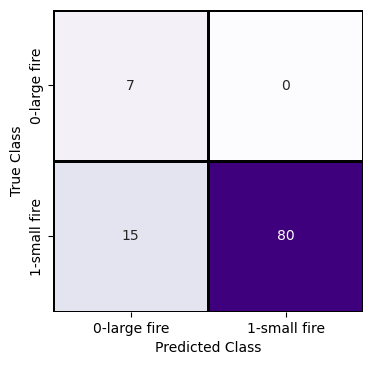

In [23]:
import seaborn as sns
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-large fire','1-small fire']
ylabels=['0-large fire','1-small fire']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


# Using Grid Search CV to find best params

In [40]:
cv = StratifiedKFold(n_splits=5,shuffle=True)
param_grid = [{'kernel':["rbf"],'gamma':[2,1,0.6,0.7,0.5,0.001,0.0001],'C':[1,2,3,5,0.1]}]
gsv = GridSearchCV(model1,param_grid,cv=cv,n_jobs = -1, verbose = 2)
gsv.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(C=1, gamma=0.6), n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 5, 0.1],
                          'gamma': [2, 1, 0.6, 0.7, 0.5, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=2)

In [41]:
gsv.best_params_ , gsv.best_score_ 

({'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}, 0.73227943390545)

In [42]:
# creating model based on above

p=gsv.best_params_

model1 = SVC(kernel=p["kernel"],gamma=p['gamma'],C=p['C'])

model1.fit(X_train , y_train)

y_pred_test = model1.predict(X_test)

y_pred_train = model1.predict(X_train)

acc_test = accuracy_score(y_test, y_pred_test) * 100

acc_train = accuracy_score(y_train, y_pred_train) * 100

print("Accuracy Test=", acc_test)

print("Accuracy Train=", acc_train)

Accuracy Test= 83.33333333333334
Accuracy Train= 94.5945945945946


In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix2=confusion_matrix(y_pred_test,y_test)
conf_matrix2

array([[10,  5],
       [12, 75]])

In [44]:
from sklearn.metrics import classification_report
names=['0-large fire','1-small fire']
print(classification_report(y_test, y_pred_test,target_names=names))

              precision    recall  f1-score   support

0-large fire       0.67      0.45      0.54        22
1-small fire       0.86      0.94      0.90        80

    accuracy                           0.83       102
   macro avg       0.76      0.70      0.72       102
weighted avg       0.82      0.83      0.82       102



Text(20.722222222222214, 0.5, 'True Class')

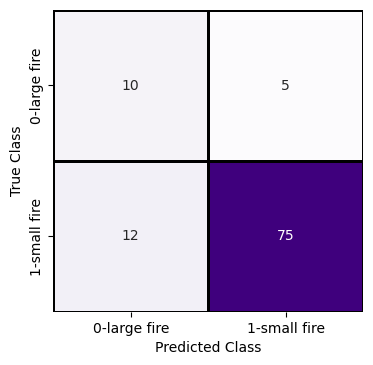

In [46]:
import seaborn as sns
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-large fire','1-small fire']
ylabels=['0-large fire','1-small fire']

sns.heatmap(conf_matrix2,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')